In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/data/dataset/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/data/dataset/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 640 images belonging to 20 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 160 images belonging to 20 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 320s 16s/step - accuracy: 0.0258 - loss: 3.7922 - val_accuracy: 0.0750 - val_loss: 2.9698
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.1019 - loss: 2.9468 - val_accuracy: 0.0875 - val_loss: 2.8996
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.1142 - loss: 2.8744 - val_accuracy: 0.0875 - val_loss: 2.8928
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.1320 - loss: 2.8037 - val_accuracy: 0.1562 - val_loss: 2.7495
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.1441 - loss: 2.7154 - val_accuracy: 0.1813 - val_loss: 2.6441
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.1698 - loss: 2.5794 - val_accuracy: 0.1937 - val_loss: 2.6895
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.1555 - loss: 2.5995 - val_accuracy: 0.2250 - val_loss: 2.4885
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.2148 - loss: 2.4430 - val_accuracy: 0.2313 - val_los

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/data/batik_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/data/batik_model.h5')

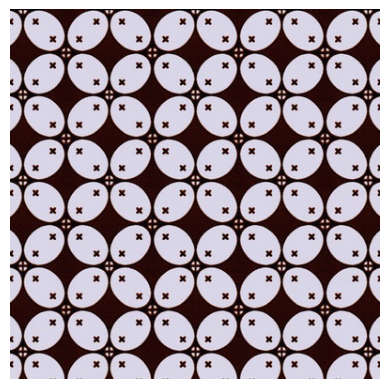

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img_path = '/content/drive/MyDrive/Colab Notebooks/data/gambar/batik kawung.png'
img = mpimg.imread(img_path)

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/data/batik_model.h5')

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/data/gambar/batik parang.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)


class_labels = list(train_generator.class_indices.keys())
print(f'Predicted Class: {class_labels[predicted_class[0]]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Class: Yogyakarta_Parang
